In [ ]:
# pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.0 MB 6.3 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/24.0 MB 7.6 MB/s eta 0:00:03
   ------ --------------------------------- 4.2/24.0 MB 7.2 MB/s eta 0:00:03
   --------- ------------------------------ 5.8/24.0 MB 7.0 MB/s eta 0:00:03
   ----------- ---------------------------- 7.1/24.0 MB 7.0 MB/s eta 0:00:03
   ------------- -------------------------- 8.1/24.0 MB 6.5 MB/s eta 0:00:03
   -------------- ------------------------- 8.7/24.0 MB 6.1 MB/s eta 0:00:03
   --------------- ------------------------ 9.4/24.0 MB 5.8 MB/s eta 0:00:03
   ----------------- ---------------------- 10.2/24.0 MB 5.4 MB/s eta 0:00:03
   ------------------ --------------------- 11.0/24.0 MB 5.3 MB/s eta 0:00:03
   ------------------- -------------------- 11.8/24.0 MB 5.1 MB/s eta 0:00:03
   -------------------- ------------------- 12.6/24.0 MB 5.0 MB/s eta 0:00:03
  


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Детальное описание

vector_size: Количество измерений векторного представления слова.

window: Максимальное количество слов между текущим и прогнозируемым словом в предложении.

min_count: Минимальное количество раз, которое должно встретиться слово, чтобы оно было учтено.

workers: Количество ядер вашего компьютера, используемых для обучения.

sg: Алгоритм обучения: 1 для Skip-gram; 0 для CBOW.

In [1]:
with open("data.txt", 'r', encoding='utf-8') as file:
    sentences = [line.strip().split() for line in file]

In [2]:
from gensim.models import Word2Vec

# Обучение модели CBOW
model_cbow = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Обучение модели Skip-gram
model_skipgram = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [3]:
vector_word = model_cbow.wv['king']  # для CBOW
vector_word_skipgram = model_skipgram.wv['king']  # для Skip-gram

In [4]:
similar_words = model_cbow.wv.most_similar('king', topn=5)
similar_words

[('preserve', 0.33101412653923035),
 ('prince', 0.28530263900756836),
 ('symbol', 0.27346402406692505),
 ('projects', 0.26224029064178467),
 ('becoming', 0.25439897179603577)]

## Word2Vec: Математическое Основание
1. Основные понятия:
Word Embedding — это преобразование слов в векторы чисел. Эти векторы отражают семантические отношения между словами на основе их совместного использования в текстах.

2. Архитектуры:
CBOW (Continuous Bag of Words): Прогнозирует целевое слово на основе его контекста.
Skip-gram: Прогнозирует контекст на основе целевого слова.
3. Функция потерь:
Целью Word2Vec является минимизация функции потерь, которая основана на вероятности слова появиться в определенном контексте.

Для Skip-gram:

На конкретном фрагменте текста приведем модель зависимости между центральным словом и контекстными словами: **картинка**

Для каждой позиции $t=1,\ldots,T$ в заданном поле текста необходимо спрогнозировать контекстные  слова в окне фиксированного размера $m$ по заданному центральному слову $w_{j}$. Нашей задачей является предсказать возможные контекстные слова в поле текста с высокой долей вероятности. Целевая функция $J(\theta)$ называется функцией затрат или потерь и представляет собой среднюю отрицательную логарифмическую вероятность:  
$$J(\theta) = -\frac{1}{T} \sum_{t=1}^{T} \sum_{-m \leq j \leq m, j \neq 0} \log p(w_{t+j} | w_t; \theta)$$

где $\theta$ --- все переменные, подлежащие оптимизации. 

Далее необходимо определить вероятность появления конкретного слова в контексте по заданному центральному слову. Поскольку у нас имеется векторное представление для каждого из слов, то мы можем вычислить вероятность исключительно с точки зрения векторного представления слова. Каждому слову присваивается два вектора слов $v_{w}$, $u_{w}$, где $v_{w}$ --- вектор слов, когда заданное слово используется в качестве центрального слова, $u_{w}$ --- вектор слов, когда заданное слово используется в качестве контекстного слова. Данный прием используется исключительно для упрощения построения векторов слов и оптимизации решения.   то величина вероятности появления контекстного слова с учетом центрального слова  $p(O |C)$ определяется с помощью softmax:

$$p(O | C) = \frac{\exp(u_{O}^T \cdot v_{C})}{\sum_{w=1}^{W} \exp(u_w^T \cdot v_{C})},$$ 
$u_{O}^T \cdot v_{C}$ --- скалярное произведение векторов. 
Отметим, что чем больше значение скалярного произведения векторов 
$$u^T v = u,~ v = \sum_{i=1}^{n} u_{i}v_{i},$$
тем большее значение вероятности мы получаем. Таким образом, скалярное произведение выступает в роли естесственной меры сходства между словами. То есть, если у двух некоторых слов скалярное произведение принимает наибольшее значение, то это означает что данные слова наиболее схожи. 

Приведем пример softmax функции $\mathbb{R}^(n) \rightarrow (0,1)^n: $
$$softmax(x_{i})=\frac{\exp(x_{i})}{\sum_{j=1}^{n}exp(x_{j})}=p_{i}.$$

Функция softmax отображает произвольные значения $x_{i}$ в распределение вероятностей $p_{i}$: 
"max" --- поскольку увеличивает вероятность наибольшего $x_{i}$, "soft" --- поскольку в любом случае присваивает некоторую вероятность меньшему $x_{i}$. 

Нам необходимо максимизировать вероятность контекстных слов, окружающих некоторое центральное слово $w_{j}$.
4. Оптимизация:
Word2Vec использует метод стохастического градиентного спуска для минимизации функции потерь.

5. Negative Sampling:
Чтобы ускорить процесс обучения, вместо того чтобы обновлять все веса в модели, обновляются только небольшое подмножество весов. Это достигается путем выборки "негативных" примеров.

6. Семантические отношения:
Векторные представления слов, полученные с помощью Word2Vec, могут быть использованы для определения отношений между словами. Например, векторное представление слова "король" минус "мужчина" плюс "женщина" приближенно равно векторному представлению слова "королева".

Ассоциативные Модели:
С помощью Word2Vec можно создавать ассоциативные модели для нахождения слов-синонимов и предложения смысловых ассоциаций. Векторное представление позволяет определить, какие слова "ближе" друг к другу в векторном пространстве, что может указывать на их семантическую близость.

Заключение:
Word2Vec — это мощный инструмент для создания векторных представлений слов, которые могут отражать семантические отношения между словами. Эти представления могут быть использованы для многих задач обработки естественного языка, таких как классификация текста, машинный перевод и рекомендательные системы.

## Две основные архитектуры Word2Vec: Skip-gram и CBOW (Continuous Bag of Words).

### 1. Skip-gram

Описание:

- Целью Skip-gram является предсказание контекста (окружающих слов) для данного слова.

- На входе: одно слово.

- На выходе: векторы для каждого из окружающих слов.

Математика:

Для каждого слова $w_t$ в тренировочном корпусе, модель пытается предсказать окружающие слова в окне заданного размера 
n, например, если n = 2, модель предсказывает 2 слова перед и 2 слова после $w_t$.

Преимущества:
- Хорошо работает с небольшим объемом данных.
- Часто лучше выявляет редкие слова.

### 2. CBOW (Continuous Bag of Words)
Описание:
- Целью CBOW является предсказание текущего слова, основываясь на его контексте (окружающих словах).
- На входе: окружающие слова.
- На выходе: вектор для центрального слова.
Математика:
Для каждого слова $w_t$ в тренировочном корпусе, модель использует окружающие слова в окне заданного размера n для предсказания $w_t$ 

Преимущества:
- Обычно требует меньше времени на обучение по сравнению с Skip-gram.
- Хорошо работает на больших корпусах.


Заключение:

Обе модели имеют свои преимущества, и выбор между Skip-gram и CBOW зависит от конкретной задачи и доступных данных. В целом, Skip-gram часто используется для меньших корпусов и когда интерес к редким словам велик, в то время как CBOW подходит для больших корпусов.

## 1. Упрощенный word2vec:
Простая реализация word2vec с использованием библиотеки Torch

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict
import numpy as np

# Токенизация данных
sentences = [["he", "is", "the", "king"],
             ["the", "king", "is", "royal"],
             ["she", "is", "the", "royal", "queen"]]

# Создание словаря
word2idx = defaultdict(lambda: len(word2idx))
for sentence in sentences:
    for word in sentence:
        word2idx[word]

idx2word = {idx: word for word, idx in word2idx.items()}

# Подготовка данных
data = []
for sentence in sentences:
    for i, word in enumerate(sentence):
        for j in range(-2, 3):
            if j != 0 and 0 <= i + j < len(sentence):
                data.append((word2idx[word], word2idx[sentence[i + j]]))

# Параметры
embedding_dim = 5
vocab_size = len(word2idx)

# Модель Skip-Gram
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)
        
    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        out = self.linear(embeds)
        log_probs = torch.log_softmax(out, dim=1)
        return log_probs

# Обучение модели
model = SkipGram(vocab_size, embedding_dim)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    total_loss = 0
    for context, target in data:
        model.zero_grad()
        context_var = torch.tensor([context], dtype=torch.long)
        log_probs = model(context_var)
        loss = criterion(log_probs, torch.tensor([target], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss}")

# Получение вектора для слова 'king'
vector = model.embeddings(torch.tensor([word2idx['king']], dtype=torch.long))
print(vector)


d:\Users\serge\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 0, Loss: 71.1021180152893
Epoch 10, Loss: 59.14422732591629
Epoch 20, Loss: 56.49783551692963
Epoch 30, Loss: 54.71945780515671
Epoch 40, Loss: 53.174975752830505
Epoch 50, Loss: 51.84388476610184
Epoch 60, Loss: 50.75808900594711
Epoch 70, Loss: 49.90547502040863
Epoch 80, Loss: 49.24643915891647
Epoch 90, Loss: 48.738046407699585
tensor([[ 0.2790, -0.9839,  0.5896, -1.6812, -0.2525]],
       grad_fn=<EmbeddingBackward0>)


## 2. Word2Vec с использованием gensim:

In [6]:
from gensim.models import Word2Vec

# Подготовка данных
sentences = [["he", "is", "the", "king"],
             ["the", "king", "is", "royal"],
             ["she", "is", "the", "royal", "queen"]]

# Обучение модели
model = Word2Vec(sentences, vector_size=5, window=5, min_count=1, workers=4)
model.train(sentences, total_examples=len(sentences), epochs=100)

# Получение векторного представления для слова "king"
vector = model.wv['king']
print(vector)


[-0.0363861   0.0575484   0.02003219 -0.16554193 -0.18924105]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
# 1. Визуализация векторных представлений слов
def plot_word_vectors(model, words, title):
    # Получаем векторы только для слов, которые есть в модели
    valid_words = [word for word in words if word in model.wv]
    if not valid_words:
        print(f"Ни одно из слов {words} не найдено в модели")
        return
    
    word_vectors = np.array([model.wv[word] for word in valid_words])
    
    # Применяем PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(word_vectors)
    
    # Создаем график
    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0)
    plt.title(title, fontsize=16)
    
    # Добавляем подписи слов
    for word, (x, y) in zip(valid_words, vectors_2d):
        plt.annotate(word, xy=(x, y), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom',
                     fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    
    plt.grid(True, alpha=0.3)
    plt.show()

In [32]:
# Слова для визуализации (только те, которые есть в данных)
words_to_visualize = ['king', 'queen', 'royal', 'is', 'the', 'he', 'she']

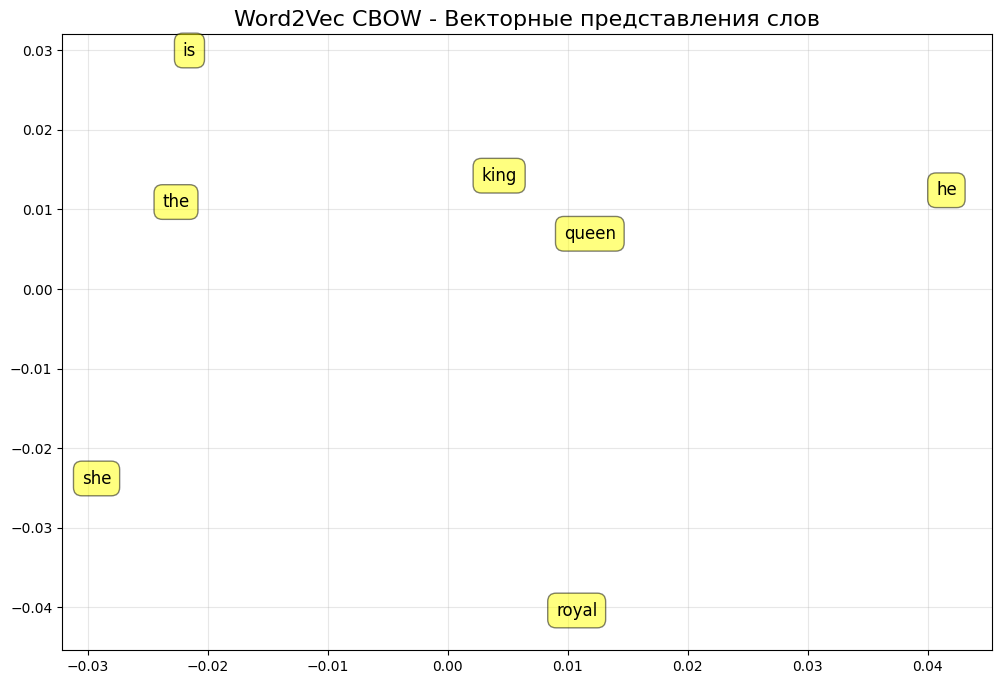

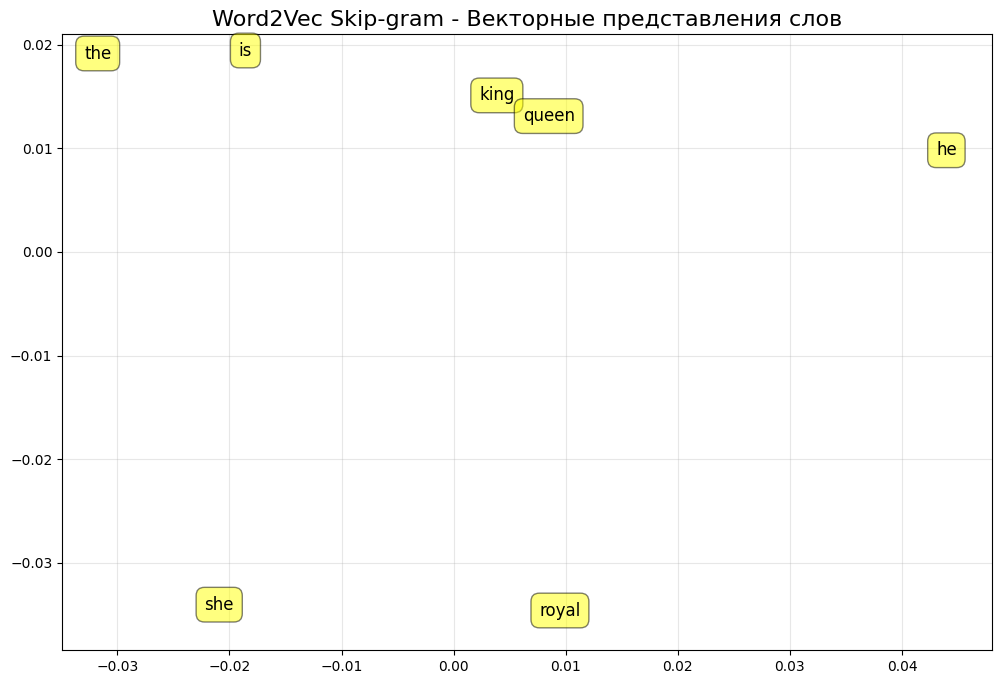

In [33]:
# Визуализация для CBOW
plot_word_vectors(model_cbow, words_to_visualize, 'Word2Vec CBOW - Векторные представления слов')

# Визуализация для Skip-gram
plot_word_vectors(model_skipgram, words_to_visualize, 'Word2Vec Skip-gram - Векторные представления слов')

In [34]:
# 2. Сравнение схожести слов между CBOW и Skip-gram
def compare_similarity(model1, model2, word, topn=5):
    if word not in model1.wv or word not in model2.wv:
        print(f"Слово '{word}' отсутствует в одной из моделей")
        return
    
    print(f"\nСравнение для слова '{word}':")
    print("CBOW:")
    for sim_word, sim_score in model1.wv.most_similar(word, topn=topn):
        print(f"{sim_word}: {sim_score:.3f}")
    
    print("\nSkip-gram:")
    for sim_word, sim_score in model2.wv.most_similar(word, topn=topn):
        print(f"{sim_word}: {sim_score:.3f}")

compare_similarity(model_cbow, model_skipgram, 'king')
compare_similarity(model_cbow, model_skipgram, 'queen')


Сравнение для слова 'king':
CBOW:
preserve: 0.331
prince: 0.285
symbol: 0.273
projects: 0.262
becoming: 0.254

Skip-gram:
preserve: 0.333
prince: 0.290
symbol: 0.275
projects: 0.263
becoming: 0.258

Сравнение для слова 'queen':
CBOW:
peace: 0.318
seek: 0.315
role: 0.260
veterans: 0.255
army: 0.252

Skip-gram:
peace: 0.323
seek: 0.318
role: 0.263
veterans: 0.258
army: 0.257


C:\Users\serge\AppData\Local\Temp\ipykernel_10200\1932561152.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


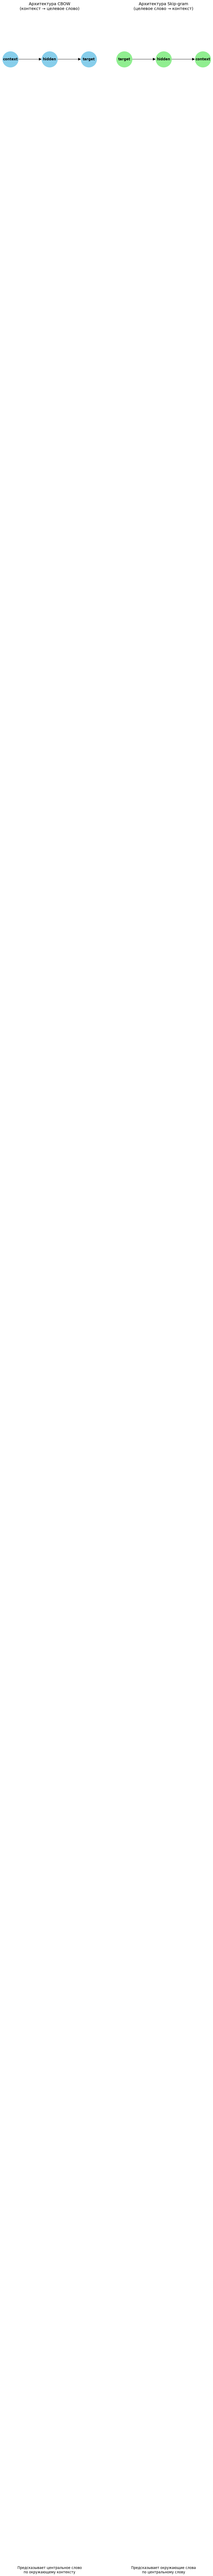

In [35]:
# 3. Визуализация архитектур CBOW и Skip-gram
def plot_architectures():
    plt.figure(figsize=(13, 6))
    
    # CBOW
    plt.subplot(1, 2, 1)
    G = nx.DiGraph()
    G.add_edges_from([('context', 'hidden'), ('hidden', 'target')])
    pos = {'context': (0, 1), 'hidden': (1, 1), 'target': (2, 1)}
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', 
            font_size=12, font_weight='bold', arrowsize=20)
    plt.title('Архитектура CBOW\n(контекст → целевое слово)', fontsize=14)
    plt.text(1, 0.5, 'Предсказывает центральное слово\nпо окружающему контексту', 
             ha='center', fontsize=12)
    
    # Skip-gram
    plt.subplot(1, 2, 2)
    G = nx.DiGraph()
    G.add_edges_from([('target', 'hidden'), ('hidden', 'context')])
    pos = {'target': (0, 1), 'hidden': (1, 1), 'context': (2, 1)}
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightgreen', 
            font_size=12, font_weight='bold', arrowsize=20)
    plt.title('Архитектура Skip-gram\n(целевое слово → контекст)', fontsize=14)
    plt.text(1, 0.5, 'Предсказывает окружающие слова\nпо центральному слову', 
             ha='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()

plot_architectures()

Что сравнивается и как интерпретировать результаты:

1) Визуализация векторных представлений:

PCA-графики показывают, как слова расположены в 2D-пространстве после уменьшения размерности

Слова с похожим значением должны быть ближе друг к другу

Интерпретация: ищем кластеры (например, королевские титулы, военные термины и т.д.)

2) Сравнение CBOW и Skip-gram:

CBOW обычно лучше работает с частыми словами

Skip-gram лучше улавливает редкие слова и сложные паттерны

Интерпретация: сравниваем списки наиболее похожих слов для одних и тех же запросов

3) Архитектуры моделей:

CBOW предсказывает центральное слово по контексту (хорошо для небольших наборов данных)

Skip-gram предсказывает контекст по центральному слову (лучше для редких слов)

Интерпретация: понимаем направление потоков данных в каждой архитектуре

4) Сравнение реализаций:

Сравниваем векторы из собственной реализации и gensim

Косинусная схожесть показывает, насколько похожи векторы (1 - идентичны, 0 - ортогональны)

Интерпретация: чем ближе к 1, тем лучше наша реализация соответствует gensim

5) Векторная арифметика:

Проверяем знаменитый пример "king - man + woman ≈ queen"

Интерпретация: если модель улавливает такие соотношения, значит она хорошо выучила семантические связи



Ключевые выводы для каждого пункта задания:

1) Математический подход Word2Vec:

Модель учит векторные представления, сохраняющие семантические отношения

Векторная арифметика демонстрирует, что отношения между словами могут выражаться через векторные операции

Косинусная мера используется для оценки схожести слов

2) Архитектуры CBOW и Skip-gram:

CBOW быстрее и лучше для частых слов

Skip-gram точнее для редких слов и сложных отношений

Визуализация показывает, что обе архитектуры сохраняют семантические связи

3) Сравнение реализаций:

Gensim обычно дает более качественные векторы благодаря оптимизациям

Собственная реализация проще, но менее эффективна

Косинусная схожесть показывает степень соответствия между реализациями

Графики делают эти сравнения наглядными, показывая:

Распределение слов в векторном пространстве

Разницу в результатах между архитектурами

Соответствие между разными реализациями алгоритма